In [1]:
import numpy as np
import pandas as pd
import pycaret
from pycaret.datasets import get_data
from pycaret.regression import *

In [2]:
data = get_data('insurance')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [3]:
s = setup(data, target= 'charges', session_id=123, normalize= True, bin_numeric_features=['age','bmi'])

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [4]:
compare_models()

GradientBoostingRegressor(random_state=123)

In [5]:
gbr = create_model('gbr')
gbr

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2484.3190,19565597.2886,4423.3016,0.8831,0.4082,0.3110
1,3028.3752,31155337.4905,5581.6966,0.8189,0.4654,0.3074
2,2711.7308,21497464.6902,4636.5359,0.7278,0.4771,0.3686
3,2585.8496,18889070.7697,4346.1559,0.8423,0.4270,0.3508
4,2724.3187,26420899.5318,5140.1264,0.8035,0.4751,0.2711
5,2792.5641,21288719.0840,4613.9700,0.8631,0.3659,0.2796
6,2506.9598,20464336.5967,4523.7525,0.8608,0.3802,0.2989
7,2851.0480,28301974.3889,5319.9600,0.8444,0.4515,0.2911
8,2504.9120,17958574.3999,4237.7558,0.8840,0.3860,0.3240


GradientBoostingRegressor(random_state=123)

In [6]:
# Create API

create_api(gbr,'my_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_api.py


In [7]:
# Create Docker

create_docker('my_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [9]:
!docker image build -f "Dockerfile" -t my_image:api_insurance .

#0 building with "desktop-linux" instance using docker driver

#1 [internal] load build definition from Dockerfile
#1 transferring dockerfile: 301B 0.0s done
#1 DONE 0.1s

#2 [internal] load metadata for docker.io/library/python:3.8-slim
#2 ...

#3 [auth] library/python:pull token for registry-1.docker.io
#3 DONE 0.0s

#2 [internal] load metadata for docker.io/library/python:3.8-slim
#2 DONE 2.9s

#4 [internal] load .dockerignore
#4 transferring context: 2B done
#4 DONE 0.0s

#5 [1/5] FROM docker.io/library/python:3.8-slim@sha256:1d52838af602b4b5a831beb13a0e4d073280665ea7be7f69ce2382f29c5a613f
#5 resolve docker.io/library/python:3.8-slim@sha256:1d52838af602b4b5a831beb13a0e4d073280665ea7be7f69ce2382f29c5a613f 0.0s done
#5 DONE 0.8s

#6 [internal] load build context
#6 transferring context: 961.76kB 3.3s done
#6 DONE 3.6s

#5 [1/5] FROM docker.io/library/python:3.8-slim@sha256:1d52838af602b4b5a831beb13a0e4d073280665ea7be7f69ce2382f29c5a613f
#5 sha256:3971691a363796c39467aae4cdce6ef773273

In [10]:
!docker images

REPOSITORY                 TAG             IMAGE ID       CREATED         SIZE
my_image                   api_insurance   7591417054bc   4 minutes ago   2.02GB
yashar0078/flasktest-app   latest          eaa650a8814a   13 days ago     211MB
docker/getting-started     latest          d79336f4812b   2 years ago     73.9MB


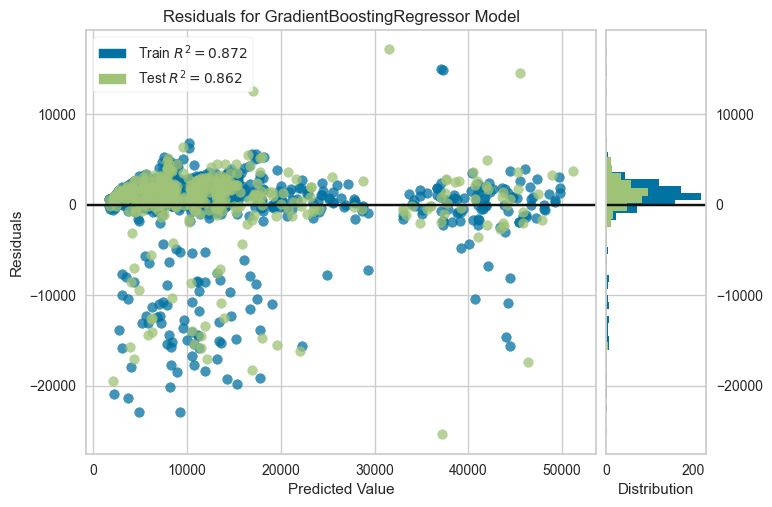

In [8]:
plot_model(gbr)

In [9]:
save_model(gbr, 'gbr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscret

In [4]:
gbr_deploy = load_model('gbr')
gbr_deploy

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

In [5]:
prediction = predict_model(gbr_deploy,data=data)
prediction

,age,sex,bmi,children,smoker,region,charges,prediction_label
0,19,female,27.900000,0,yes,southwest,16884.923828,17525.799964
1,18,male,33.770000,1,no,southeast,1725.552246,4384.705907
2,28,male,33.000000,3,no,southeast,4449.461914,5820.970884
3,33,male,22.705000,0,no,northwest,21984.470703,4044.781896
4,32,male,28.879999,0,no,northwest,3866.855225,4030.234092
...,...,...,...,...,...,...,...,...
1333,50,male,30.969999,3,no,northwest,10600.547852,11416.848690
1334,18,female,31.920000,0,no,northeast,2205.980713,4307.951959
1335,18,female,36.849998,0,no,southeast,1629.833496,3737.583701
1336,21,female,25.799999,0,no,southwest,2007.944946,3108.519530
